In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtd/globalterrorismdb_0718dist.csv


In [2]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import plotly.offline as py
import plotly.graph_objs as go

In [3]:
import pandas as pd
data=pd.read_csv('/kaggle/input/gtd/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)


In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
col=list(data.columns)
print(len(col))
col

135


['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [6]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181256 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [8]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [9]:
print("most attack type: ",data['AttackType'].value_counts().idxmax())
print("country with most attacks: ",data['Country'].value_counts().idxmax())
print("city with most attacks: ",data['city'].value_counts().idxmax())
print("region with most attack: ",data['Region'].value_counts().idxmax())
print("group with most attack: ",data['Group'].value_counts().idxmax())
print("year with maximum attack: ",data['Year'].value_counts().idxmax())

most attack type:  Bombing/Explosion
country with most attacks:  Iraq
city with most attacks:  Unknown
region with most attack:  Middle East & North Africa
group with most attack:  Unknown
year with maximum attack:  2014


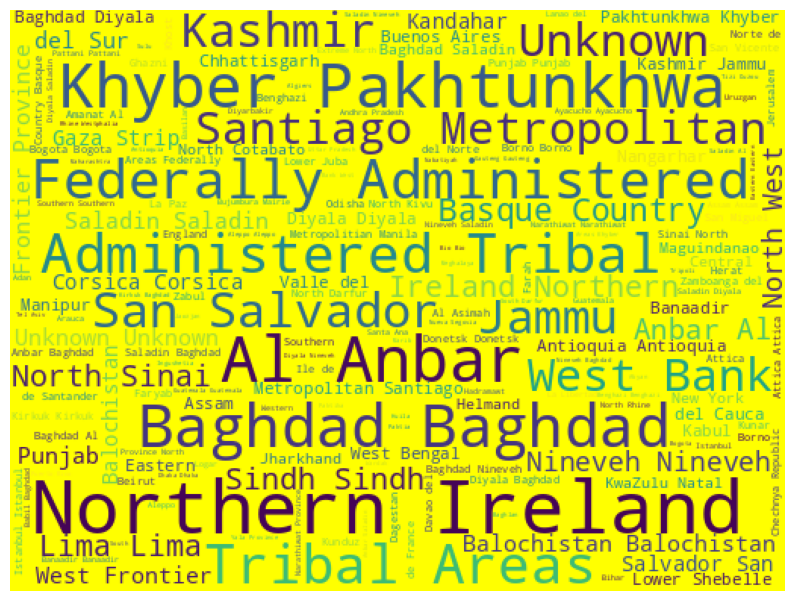

In [10]:
from wordcloud import WordCloud
from scipy import signal
city = data.state.dropna()
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(background_color = 'yellow',
                    width=512,
                    height=384).generate(' '.join(city))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [11]:
year=data['Year'].value_counts(dropna=False).sort_index()
year

Year
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: count, dtype: int64

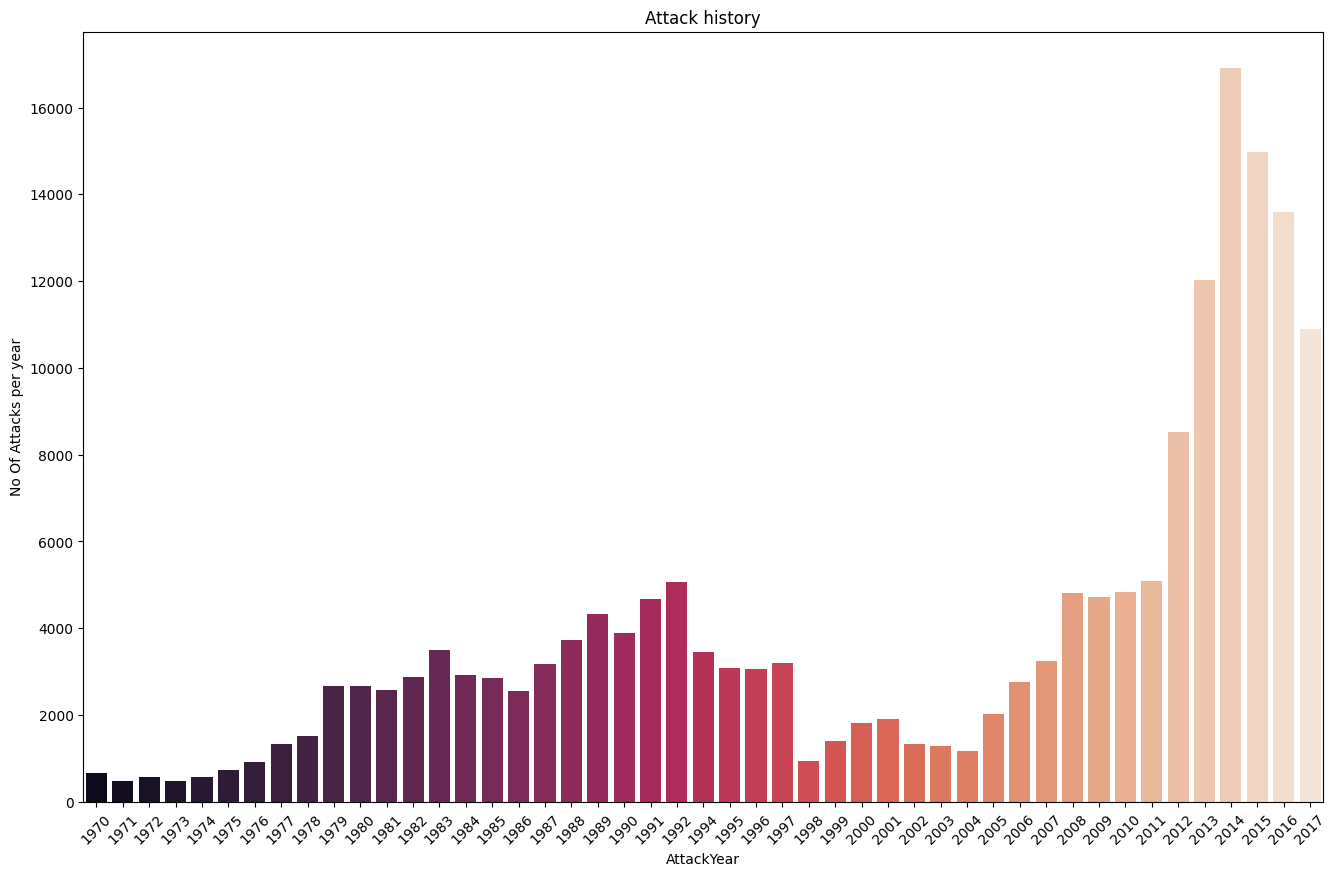

In [12]:
x_year=data['Year'].unique()
y_count_yrs=data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(16,10))
sns.barplot(x=x_year,
           y=y_count_yrs,
           palette='rocket')
plt.xticks(rotation=45)
plt.xlabel('AttackYear')
plt.ylabel('No Of Attacks per year')
plt.title('Attack history')
plt.show()

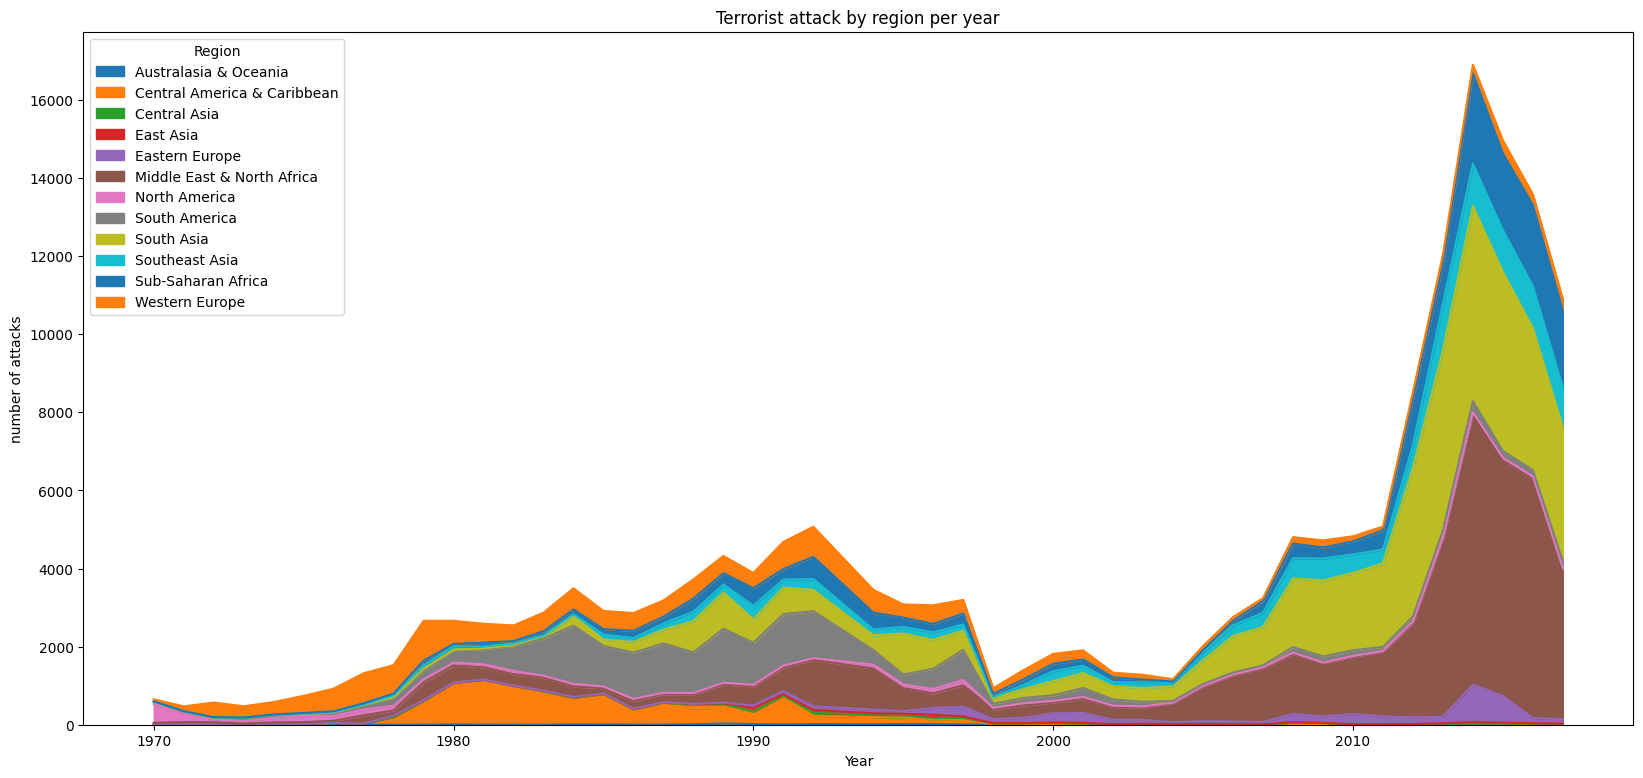

In [13]:
pd.crosstab(data.Year ,data.Region).plot(kind='area',figsize=(20,9))
plt.title('Terrorist attack by region per year')
plt.ylabel('number of attacks')
plt.show()

In [14]:
data['Wounded'] = data['Wounded'].fillna(0).astype(int)
data['Killed'] = data['Killed'].fillna(0).astype(int)
data['casualities'] = data['Killed'] +data['Wounded']

In [15]:
trr1 = data.sort_values(by='casualities',ascending=False)[:40]

In [16]:
heat=trr1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [17]:
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


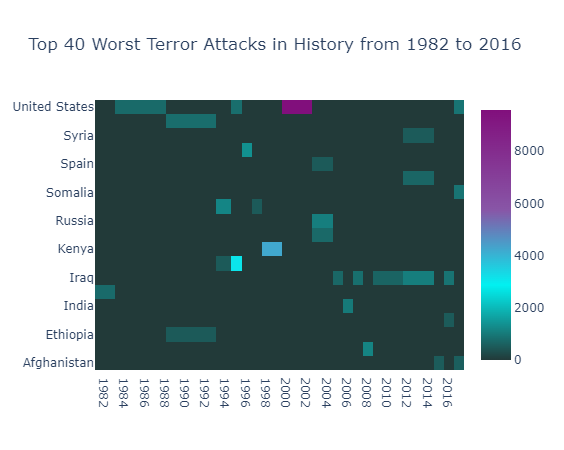

In [18]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#223a39'], [.3, '#01F1F1'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
dat = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [19]:
data.Group.value_counts()[1:15]

Group
Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: count, dtype: int64

In [21]:
killd=data.loc[:,'Killed']
attackd=data.loc[:,'AttackType']
typekilledd=pd.concat([attackd,killd],axis=1)
typekilledd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   AttackType  181691 non-null  object
 1   Killed      181691 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


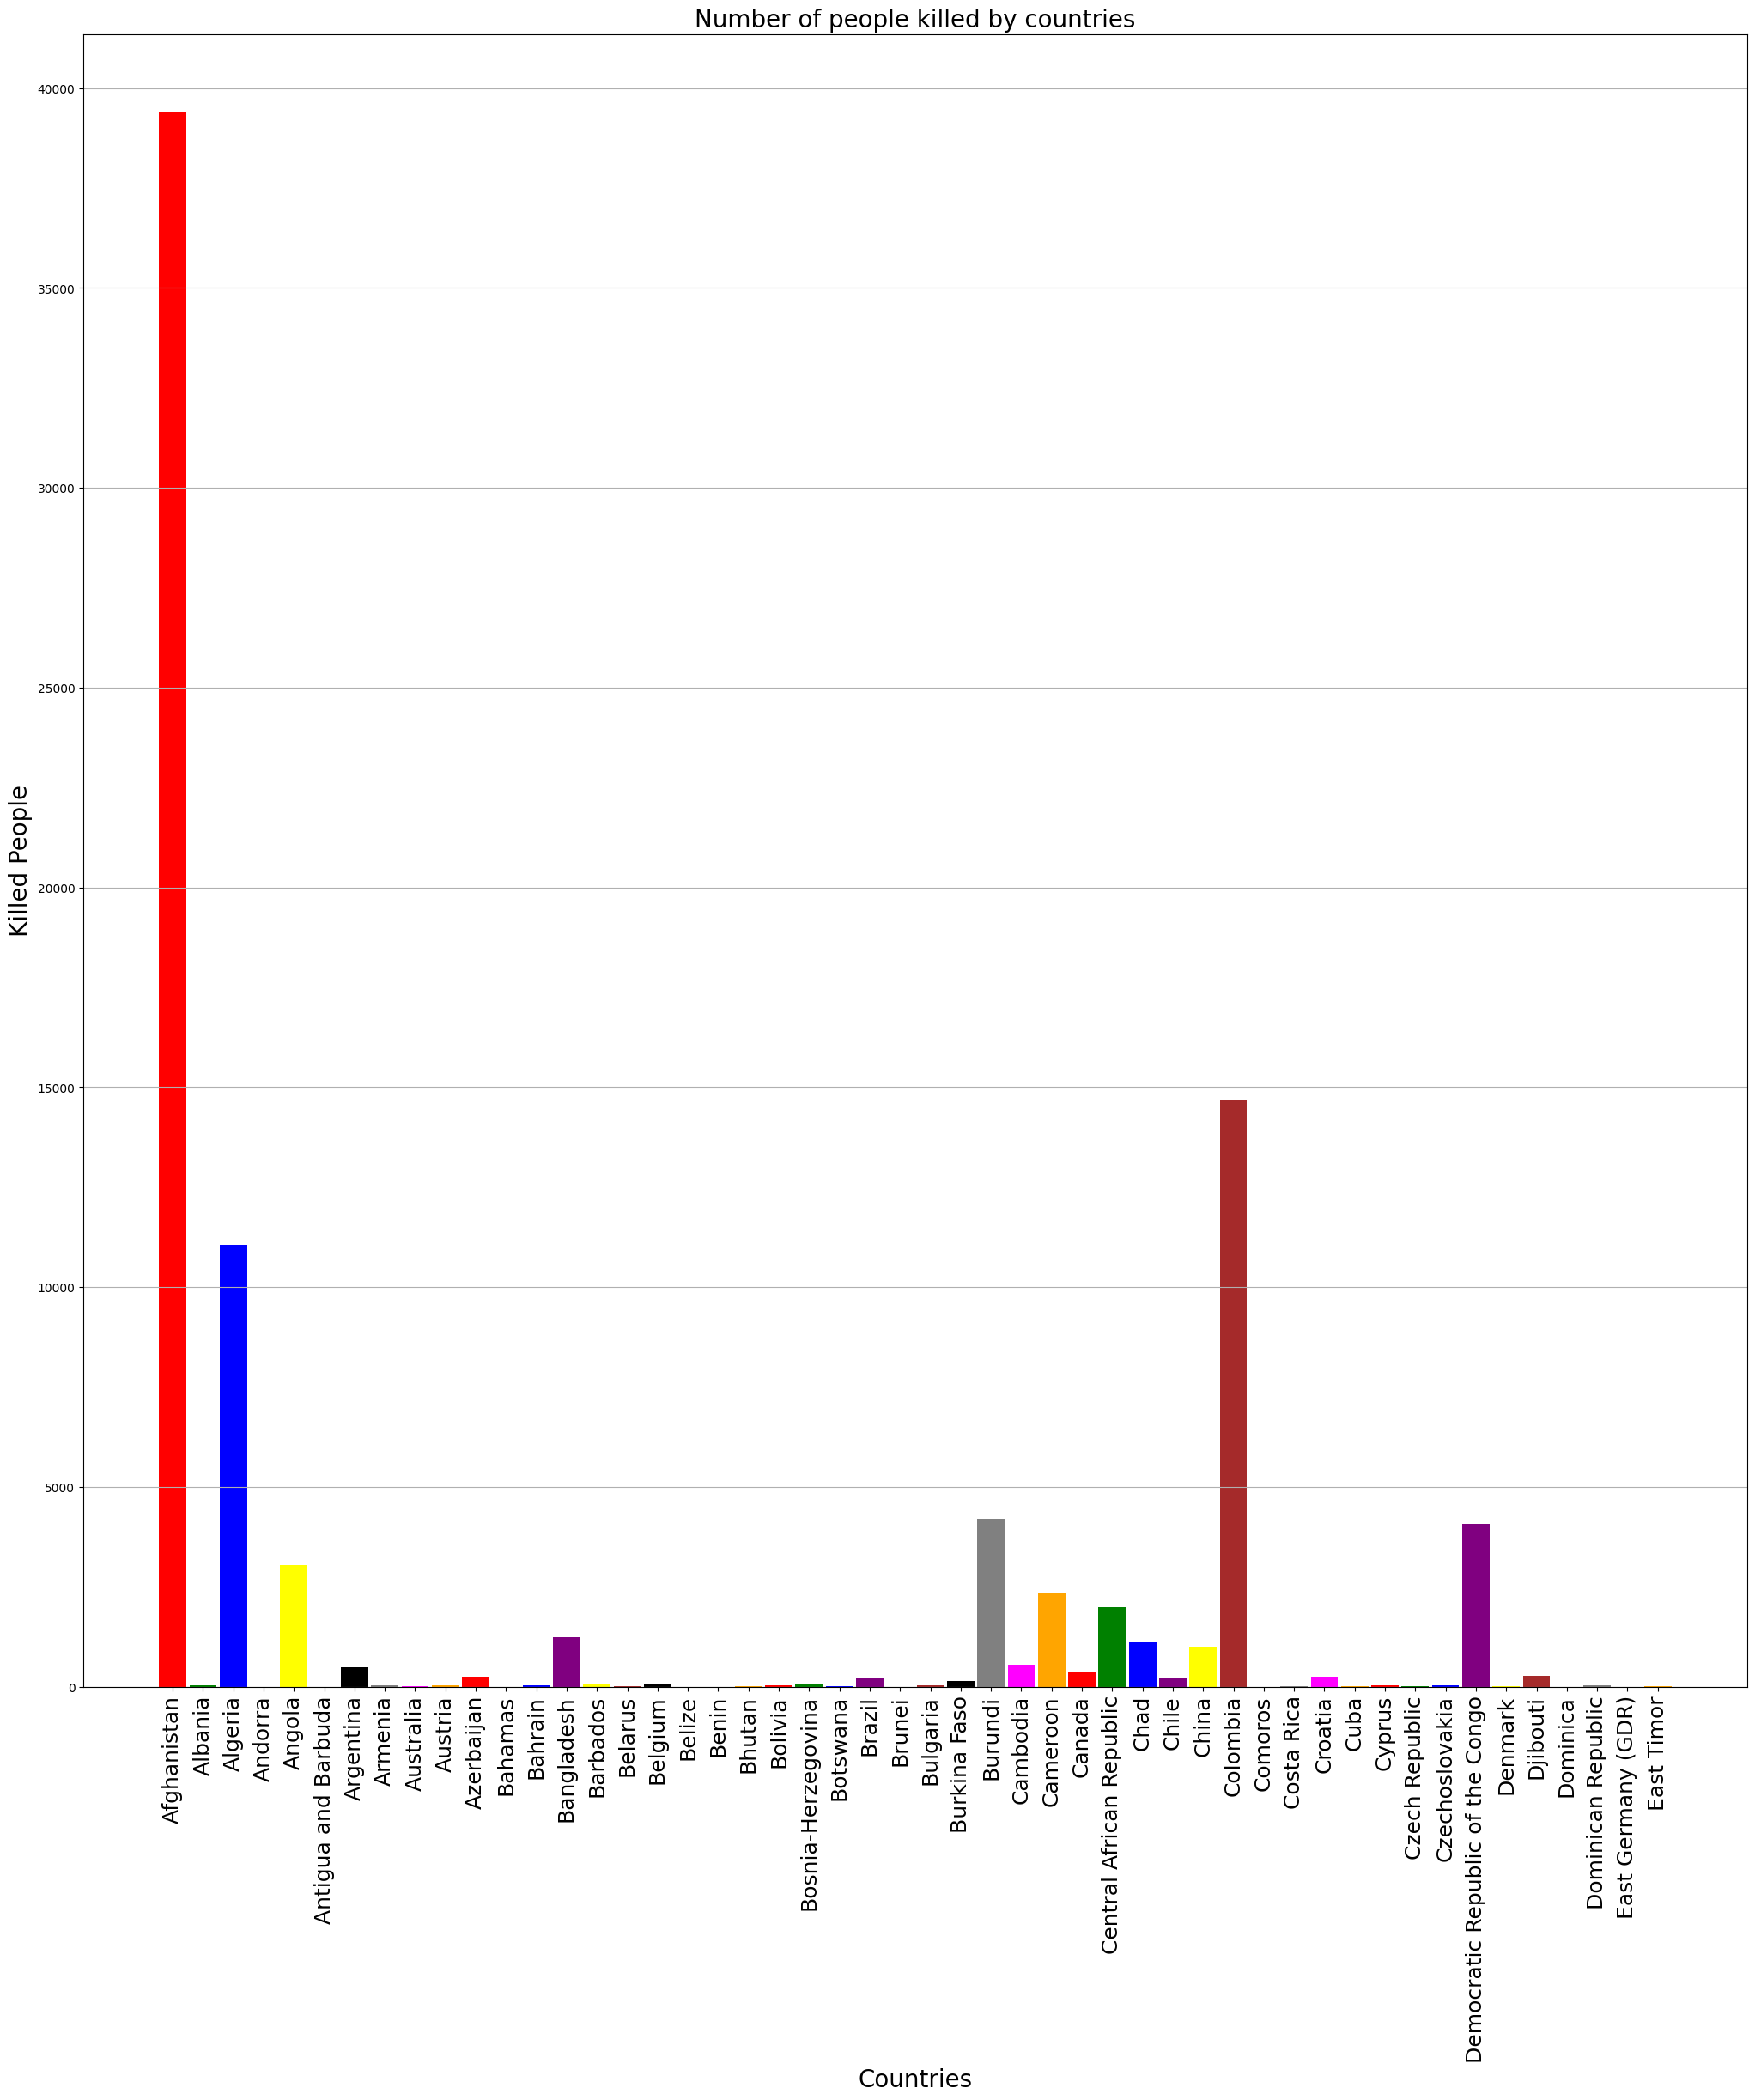

In [23]:
countryd=data.loc[:,'Country']
countrykilld=pd.concat([countryd,killd],axis=1)
countrykillf=countrykilld.pivot_table(columns='Country',values='Killed',aggfunc='sum')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
labels = countrykillf.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countrykillf.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

Terrorist incidents in the Middle East and North Africa have had devastating impacts. This region is unfortunately known for experiencing severe acts of terrorism. It's important to note that while there is a misguided perception associating Muslims with terrorism, Muslims are actually the primary victims of these attacks. When examining the data, it becomes evident that Iraq, Afghanistan, and Pakistan have suffered the most. It's noteworthy that all these nations are predominantly Muslim.